# HOMEWORK 5 ADM 

**Authors:**

In [58]:
data = {'Name': ['Ramona Tarantino', 'Nicola', 'MIchela', 'Gianmarco'],
        'Matricula': [2082006, 347842, 2343838, 338748],
        'Email': ['ramonatarantino@gmail.com', 'email', 'email', 'email']}

In [60]:
data = pd.DataFrame(data)


In [61]:
display(data)

,Name,Matricula,Email
0,Ramona Tarantino,2082006,ramonatarantino@gmail.com
1,Nicola,347842,email
2,MIchela,2343838,email
3,Gianmarco,338748,email


In [3]:
import pandas as pd
import networkx as nx
import numpy as np
import pickle

## Dataset

In [68]:
edges = pd.read_csv("edges.csv")
edges

,hero,comic
0,24-HOUR MAN/EMMANUEL,AA2 35
1,3-D MAN/CHARLES CHAN,AVF 4
2,3-D MAN/CHARLES CHAN,AVF 5
3,3-D MAN/CHARLES CHAN,COC 1
4,3-D MAN/CHARLES CHAN,H2 251
...,...,...
96099,ZZZAX,H2 326
96100,ZZZAX,H2 327
96101,ZZZAX,M/CP 8/4
96102,ZZZAX,PM 47


In [4]:
hero_network = pd.read_csv('hero-network.csv')
hero_network 

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
...,...,...
574462,COLOSSUS II/PETER RA,CALLISTO
574463,CALLISTO,ROGUE /
574464,CALLISTO,CALIBAN/
574465,CALIBAN/,ROGUE /


In [5]:
nodes = pd.read_csv('nodes.csv')
nodes

,node,type
0,2001 10,comic
1,2001 8,comic
2,2001 9,comic
3,24-HOUR MAN/EMMANUEL,hero
4,3-D MAN/CHARLES CHAN,hero
...,...,...
19085,"ZOTA, CARLO",hero
19086,ZOTA,hero
19087,ZURAS,hero
19088,ZURI,hero


# 1. Data

### DATA PREPROCESSING
- Some heroes' names in 'hero-netowrk.csv' have extra spaces at the end of their names compared to their names in 'edges.csv'.
- Some heroes' names in 'hero-netowrk.csv' have an extra '/' at the end of their names compared to their names in 'edges.csv'.
- The hero name 'SPIDER-MAN/PETER PARKER' in 'edges.csv' has been changed to 'SPIDER-MAN/PETER PAR' in 'hero-network.csv' due to a string length limit in 'hero-network.csv'.


In [ ]:
import csv
import re

# Read the hero-network.csv file
with open('hero-network.csv', 'r') as f:
    reader = csv.reader(f)
    
    # Create a new list to hold the cleaned data
    cleaned_data = []
    for row in reader:
        # Use a regular expression to remove the extra spaces from the names
        # in the row
        cleaned_row = [re.sub(r' +', '', name) for name in row]
        
        
        # Add the cleaned row to the list
        cleaned_data.append(cleaned_row)

# Write the cleaned data to a new CSV file
with open('hero-network-cleaned.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerows(cleaned_data)

In [ ]:
# find the names that appear in both sets of names
import pandas as pd
df1 = pd.read_csv('hero-network-cleaned.csv')

# read the second dataset into a dataframe
df2 = pd.read_csv('edges.csv')

# create a set of hero names from the hero1 and hero2 columns in the first dataset
hero_names1 = set(df1['hero1']) | set(df1['hero2'])

# create a set of hero names from the hero column in the second dataset
hero_names2 = set(df2['hero'])

common_names = df1[df1['hero1'].isin(hero_names2) | df1['hero2'].isin(hero_names2)]

# print the common names
print(common_names)

common_names.count()


In [ ]:
# read the hero-network.csv file into a dataframe
import pandas as pd
hero_network_df = pd.read_csv('hero-network.csv')

# read the edges.csv file into a dataframe
edges_df = pd.read_csv('edges.csv')

# create a set of hero names from the hero1 and hero2 columns in hero-network.csv
hero_network_names = set(hero_network_df['hero1']) | set(hero_network_df['hero2'])

# create a set of hero names from the hero column in edges.csv
edges_names = set(edges_df['hero'])

# find the names that appear in hero-network.csv but not in edges.csv
# and remove any extra spaces and the extra '/' from the end of the names
missing_names = [name.strip()[:-1] for name in hero_network_names - edges_names if name[-1] == '/']

# update the names in hero-network.csv to match the names in edges.csv
hero_network_df.loc[hero_network_df['hero1'].isin(missing_names), 'hero1'] = missing_names
hero_network_df.loc[hero_network_df['hero2'].isin(missing_names), 'hero2'] = missing_names

# write the updated dataframe to a new csv file
hero_network_df.to_csv('hero-network-corrected.csv', index=False)


In [ ]:
print(missing_names)

In [ ]:
hero_network_df_corrected = pd.read_csv('hero-network-corrected.csv')
hero_network_df_corrected 

In [ ]:
# load the dataset into a pandas DataFrame
hero_network_df_corrected = pd.read_csv('hero-network.csv')

# replace the string 'SPIDER-MAN/PETER PAR' with 'SPIDER-MAN/PETER PARKER' in columns 'hero1' and 'hero2'
hero_network_df_corrected['hero1'] = hero_network_df_corrected['hero1'].replace('SPIDER-MAN/PETER PAR', 'SPIDER-MAN/PETER PARKER')
hero_network_df_corrected['hero2'] = hero_network_df_corrected['hero2'].replace('SPIDER-MAN/PETER PAR', 'SPIDER-MAN/PETER PARKER')

# save the modified DataFrame to a new CSV file
hero_network_df_corrected.to_csv('modified-hero-network.csv', index=False)


In [7]:
df = pd.read_csv('modified-hero-network.csv')
df

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
...,...,...
574462,COLOSSUS II/PETER RA,CALLISTO
574463,CALLISTO,ROGUE /
574464,CALLISTO,CALIBAN/
574465,CALIBAN/,ROGUE /


- Some entries in the 'hero-network.csv' have the same hero in both columns. In the graph, these entries form a self-loop. Because a self-loop makes no sense in this network, you can safely remove those from the dataset.

In [ ]:
df_subset = df[df['hero1'] != df['hero2']]
# save the new DataFrame to a new CSV file
df_subset.to_csv('final-hero-network.csv', index=False)

In [ ]:
df = pd.read_csv('final-hero-network.csv')
df

In [9]:
count = df[df['hero1'] == df['hero2']].shape[0]

# print the count
print(count)

#OK IT WORKS, there's not the duplicate rows

0


In [17]:
df = df[df['hero1'] != df['hero2']]

In [19]:
df.to_csv('final-hero-network2.csv', index=False)

In [78]:
df = pd.read_csv('final-hero-network2.csv')
df

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
...,...,...
572230,COLOSSUS II/PETER RA,CALLISTO
572231,CALLISTO,ROGUE /
572232,CALLISTO,CALIBAN/
572233,CALIBAN/,ROGUE /


#### 'final-hero-network2.csv' is the final dataset preprocessed

### Graphs setup

**First graph** : Will be constructed using the data stored in the 'hero-network.csv' file, in which an edge between two heroes can be found if they have appeared in the same comic together. The number of edges between two heroes represents the number of times they have collaborated in different comics. The graph should be considered weighted and undirected. It is up to you to decide which metric to use to calculate the weights, but we anticipate that the cost will be lower for heroes with more collaborations. Please specify which metric you used to select the weights in the report.



In [90]:
df_hero = pd.read_csv('final-hero-network2.csv')

edge_df = df_hero.groupby(['hero1', 'hero2']).size().reset_index(name='weight')


G = nx.from_pandas_edgelist(edge_df, 'hero1', 'hero2', edge_attr='weight', create_using = nx.Graph)


In [307]:
data_df = pd.read_csv('final-hero-network2.csv')

# Group the data by hero1 and hero2, and calculate the total number of collaborations between each pair
edge_df = data_df.groupby(['hero1', 'hero2']).size().reset_index(name='collaborations')

# Create an empty graph object
G = nx.Graph(weighted=True, directed=False)

# Add edges to the graph
for i, row in edge_df.iterrows():
    hero1 = row['hero1']
    hero2 = row['hero2']
    collaborations = row['collaborations']
    
    # Calculate the weight of the edge using the inverse of the total number of collaborations
    weight = 1 / collaborations
    
    # Add the edge to the graph
    G.add_edge(hero1, hero2, weight=weight)


In [308]:
nx.info(G)

'Graph with 6426 nodes and 167207 edges'

In [317]:
print(f'Number of nodes: {G.number_of_nodes()}')
print(f'Number of edges: {G.number_of_edges()}')

Number of nodes: 6426
Number of edges: 167207


### SECOND GRAPH

In [22]:
import pandas as pd
import networkx as nx

# Read the nodes data from nodes.csv into a DataFrame
nodes_df = pd.read_csv('nodes.csv')

# Read the edges data from edges.csv into a DataFrame
edges_df = pd.read_csv('edges.csv')

# Create a graph from the edges DataFrame
G2 = nx.from_pandas_edgelist(edges_df, 'hero', 'comic')

# Set the node type as an attribute of the nodes in the graph
nodes_df = nodes_df.set_index('node')
node_types = nodes_df['type']
nx.set_node_attributes(G2, node_types, 'type')


In [91]:
nx.info(G2)

'Graph with 19090 nodes and 96104 edges'

This code will create an undirected, unweighted graph with nodes for each hero and comic in the data, and edges between heroes and comics indicating which heroes appear in which comics. The node type (hero or comic) will be stored as an attribute of the node.

### Save the two graphs in a pickle files 

In [318]:
# Save the graph to a file using pickle
with open('graph1.pickle', 'wb') as f:
    pickle.dump(G, f)
    
with open('graph2.pickle', 'wb') as f:
    pickle.dump(G2, f)
    

In [319]:
with open('graph1.pickle', 'rb') as f:
    G1 = pickle.load(f)


In [95]:
nx.info(G1)

'Graph with 6426 nodes and 167207 edges'

In [5]:
with open('graph2.pickle', 'rb') as f:
    G2 = pickle.load(f)

In [7]:
nx.info(G2)

'Graph with 19090 nodes and 96104 edges'

## 2. Backend Implementation

Definition: As the number of nodes and edges grows, we may request to work on a subset of the data to reduce computation time and improve network visualization. In this case, we will ask you only to consider the data for top N heros. We define the top N heroes as follows:
- **Top N heroes**: The **top N heroes who have appeared in the most number of comics**. The 'edges.csv' file, which represents the comics in which each hero has appeared, can be used to filter these N heroes.

The goal of this part is the implementation of a controller system that has different functionalities. The controller should take as input an identifier "i" and run the associated function_i applied to the graph you create from the downloaded data.

In [293]:
def my_number_of_nodes(G):
    return len(G.nodes)
def adjacent_edges(G, node):
    # Initialize an empty list to store the adjacent edges
    adjacent_edges = []
    # Iterate over all the edges in the graph
    for u, v in G.edges():
        # If the node is the source or target of the edge, add it to the list of adjacent edges
        if u == node or v == node:
            adjacent_edges.append((u, v))
    # Return an iterator over the adjacent edges
    return iter(adjacent_edges)
def my_neighbors(G, node):
    # Initialize a set to store the neighbors
    neighbors = set()
    # Iterate over the edges adjacent to the node
    for n1, n2 in adjacent_edges(G,node):
        # If the node is the source of the edge, add the target to the set of neighbors
        if n1 == node:
            neighbors.add(n2)
        # If the node is the target of the edge, add the source to the set of neighbors
        elif n2 == node:
            neighbors.add(n1)
    # Convert the set to a list and return it
    return list(neighbors)
def my_density(G):
    num_nodes = len(G.nodes)
    num_edges = len(G.edges)
    if num_nodes == 0 or num_nodes == 1:
        return 0
    return num_edges / (num_nodes * (num_nodes - 1) / 2)
def my_degree_histogram(G):
    degrees = [len(G[node]) for node in G.nodes]
    max_degree = max(degrees)
    histogram = [0] * (max_degree+1)
    for d in degrees:
        histogram[d] += 1
    return histogram
def my_degree(G):
    # Initialize a dictionary to store the degrees of the nodes
    degrees = {}
    # Iterate over all the nodes in the graph
    for node in G.nodes():
        # Find the neighbors of the node
        neighbors = list(my_neighbors(G, node))
        # Store the degree of the node in the dictionary
        degrees[node] = len(neighbors)
    # Return the dictionary of degrees
    return degrees

In [290]:
def functionality_1(G, graph_type, N=None):
    features={}
  # graph_type should be either 1 or 2
  # N is the top N heroes that should be considered (if not provided, consider all heroes)

  # if N is not provided, consider all heroes in the graph
    if N is None:
        G_sub = G
    else:
        G_sub = nx.subgraph(G, list(edges_df['hero'].value_counts().head(N).index) +     # we are taking a subgraph with only nodes of the top N heroes
                         list(edges_df[edges_df['hero'].isin(list(edges_df['hero'].value_counts().head(N).index))]['comic'].unique()))    # we are also considering the nodes of the comics where top N heroes appeared 

  # now we can use the G_sub graph to compute the desired statistics

    if graph_type == 1:
      # use a Counter to count the number of collaborations of each hero
        from collections import Counter
        collaboration_counts = Counter()
        for source, target, weight in G_sub.edges(data='weight'):
            collaboration_counts[source] += weight
            collaboration_counts[target] += weight
        collaboration_counts_dict = dict(collaboration_counts)    
        features['collaborations']  = collaboration_counts_dict
        
        
        num_nodes = G_sub.number_of_nodes()
        features['number_of_nodes'] = num_nodes


    elif graph_type == 2:
        # Get the node types (hero or comic) of all the nodes in the graph
        node_types = nx.get_node_attributes(G_sub, 'type')

        # Initialize dictionaries to track the number of heroes that have appeared in each comic
        hero_appearances = {}
        comic_appearances_total = {}

        # Iterate over the nodes in the graph
        for node, node_type in node_types.items():
            # Count the number of neighbors of the node
            num_neighbors = len(list(G_sub.neighbors(node)))
            if node_type == 'hero':  # If the node is a hero node
                # Add the count of its neighbors to the dictionary that tracks the number of heroes that have appeared in each comic
                hero_appearances[node] = num_neighbors
            else:  # If the node is a comic node
                # Add the count of its neighbors to the dictionary that tracks the number of heroes that have appeared in each comic
                comic_appearances_total[node] = num_neighbors

        features['hero_appearances'] = hero_appearances
        features['comic_appearances_total'] = comic_appearances_total
        
        
        # Get the node types (hero or comic) of all the nodes in the graph
        node_types = nx.get_node_attributes(G_sub, 'type')

        # Initialize counters for the number of hero and comic nodes
        num_hero_nodes = 0
        num_comic_nodes = 0

        # Iterate over the nodes in the graph
        for node, node_type in node_types.items():
            if node_type == 'hero':  # If the node is a hero node
                num_hero_nodes += 1  # Increment the counter for hero nodes
            else:  # If the node is a comic node
                num_comic_nodes += 1  # Increment the counter for comic nodes

        
        features['Number of hero nodes'] = num_hero_nodes
        features['Number of comic nodes'] = num_comic_nodes


    # compute the network's density
    density = nx.density(G_sub)
    features['density'] = density 
    
    #The network's degree distribution
    degree_distribution = nx.degree_histogram(G_sub)
    features['degree_distribution'] = degree_distribution
    
    # Get the average degree of the network
    degrees = dict(G_sub.degree())
    avg_degree = sum(degrees.values()) / len(degrees)
    features['avg_degree'] = avg_degree

    # Get the network's Hubs (nodes with degree greater than 95th percentile of degree distribution)
    # Sort the degrees in descending order
    sorted_degrees = sorted(degrees.values(), reverse=True)

    # Compute the 95th percentile of the degree distribution
    pctile = np.percentile(sorted_degrees, 95)

    # Identify the hubs as the nodes with degrees greater than or equal to the 95th percentile
    hubs = [node for node, degree in degrees.items() if degree >= pctile]
    features['hubs'] = hubs
    
    # Determine if the network is sparse or dense
    if density < 0.1:
        sparsity = "sparse"
    else:
        sparsity = "dense"
    features['network_type'] = sparsity
    
 
    return(features)


In [295]:
# Create a dictionary mapping the identifier i to the function function_i
functions = {
    1: functionality_1   
}

In [296]:
# Read the identifier i from the user
i = int(input('Enter an identifier: '))
# Look up the function corresponding to the identifier i
func = functions[i]
# Execute the function on the graph
func(G1, 1, N=10)


Enter an identifier: 1


{'collaborations': {'SPIDER-MAN/PETER PARKER': 355,
  'CAPTAIN AMERICA': 543,
  'HULK/DR. ROBERT BRUC': 280,
  'HUMAN TORCH/JOHNNY S': 990,
  'MR. FANTASTIC/REED R': 959,
  'THING/BENJAMIN J. GR': 1013,
  'THOR/DR. DONALD BLAK': 476},
 'number_of_nodes': 7,
 'density': 1.0,
 'degree_distribution': [0, 0, 0, 0, 0, 0, 7],
 'avg_degree': 6.0,
 'hubs': ['SPIDER-MAN/PETER PARKER',
  'HUMAN TORCH/JOHNNY S',
  'CAPTAIN AMERICA',
  'HULK/DR. ROBERT BRUC',
  'THOR/DR. DONALD BLAK',
  'THING/BENJAMIN J. GR',
  'MR. FANTASTIC/REED R'],
 'network_type': 'dense'}

## 3. Frontend Implementation

### Visualization 1 - Visualize some features of the network

#### A table containing the following general information about the graph:

- Number of nodes in the network
- Density of the network
- Average degree of the network
- Whether the network is sparse or dense

#### FIRST GRAPH

In [247]:
my_dict1 = functionality_1(G1, 1, N=50)

In [228]:
my_dict1.keys()

dict_keys(['collaborations', 'number_of_nodes', 'density', 'degree_distribution', 'avg_degree', 'hubs', 'network_type'])

In [248]:
# Create the DataFrame and set the index to the 'Number of nodes' column
import pandas as pd

# Define the dictionary containing the data about the graph
dati = {
    'Number of nodes': my_dict1['number_of_nodes'],
    'Density': my_dict1['density'],
    'Average degree': my_dict1['avg_degree'],
    'Sparse/Dense': 'Sparse' if my_dict1['network_type'] == 'sparse' else 'Dense'
}

# Create the DataFrame and set the index to the 'Number of nodes' column

df = pd.DataFrame(dati,index=[''])






### Table of the first graph


In [249]:
print(df)

  Number of nodes   Density  Average degree Sparse/Dense
               35  0.971429       33.028571        Dense


#### SECOND GRAPH

In [250]:
my_dict2 = functionality_1(G2, 2, N=50)

In [231]:
my_dict2.keys()

dict_keys(['hero_appearances', 'comic_appearances_total', 'Number of hero nodes', 'Number of comic nodes', 'density', 'degree_distribution', 'avg_degree', 'hubs', 'network_type'])

In [251]:
import pandas as pd

# Define the dictionary containing the data about the graph
dati = {
    'Number of hero nodes': my_dict2['Number of hero nodes'],
    'Number of comic nodes': my_dict2['Number of comic nodes'],
    'Density': my_dict2['density'],
    'Average degree': my_dict2['avg_degree'],
    'Sparse/Dense': 'Sparse' if my_dict2['network_type'] == 'sparse' else 'Dense'
}

# Create the DataFrame and set the index to the 'Number of nodes' column

df2 = pd.DataFrame(dati,index=[''])


### Table of the second graph

In [252]:
print(df2)

  Number of hero nodes  Number of comic nodes   Density  Average degree  \
                    49                   9236  0.000643        5.968986   

 Sparse/Dense  
       Sparse  


### A table that lists the network's hubs

In [253]:
import pandas as pd

# Define the data to include in the table
data = {'Hubs': my_dict1['hubs']}

# Create the DataFrame
df = pd.DataFrame(data)

# Print the resulting table
print(df)


                       Hubs
0      SHE-HULK/JENNIFER WA
1      COLOSSUS II/PETER RA
2      THING/BENJAMIN J. GR
3      CYCLOPS/SCOTT SUMMER
4   SPIDER-MAN/PETER PARKER
5      BEAST/HENRY &HANK& P
6         JAMESON, J. JONAH
7      HUMAN TORCH/JOHNNY S
8      MARVEL GIRL/JEAN GRE
9      THOR/DR. DONALD BLAK
10     SUB-MARINER/NAMOR MA
11     MR. FANTASTIC/REED R
12          CAPTAIN AMERICA
13     HULK/DR. ROBERT BRUC
14     SILVER SURFER/NORRIN
15     ANGEL/WARREN KENNETH
16     WONDER MAN/SIMON WIL
17     ANT-MAN/DR. HENRY J.
18     STORM/ORORO MUNROE S


In [254]:
import pandas as pd

# Define the data to include in the table
data = {'Hubs': my_dict2['hubs']}

# Create the DataFrame
df2 = pd.DataFrame(data)

# Print the resulting table
print(df2)


                    Hubs
0                  A 206
1                  A 175
2    ICEMAN/ROBERT BOBBY
3                    X 3
4    SHADOWCAT/KATHERINE
..                   ...
494               UX 376
495                AWC 4
496               UX 138
497                  A 8
498                 A 82

[499 rows x 1 columns]


### A plot depicting the number of collaborations of each hero in descending order (if the graph is type 1)

In [245]:
import matplotlib.pyplot as plt

In [255]:
collab = my_dict1['collaborations'] 

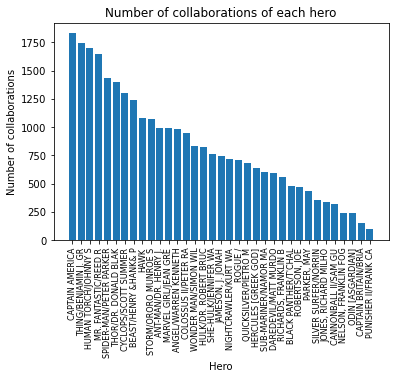

In [259]:
# Sort the dictionary in descending order by the collaboration count
sorted_collaboration_counts = {k: v for k, v in sorted(collab.items(), key=lambda item: item[1], reverse=True)}

# Get the hero names and collaboration counts from the sorted dictionary
heroes = list(sorted_collaboration_counts.keys())
counts = list(sorted_collaboration_counts.values())

# Plot the collaboration counts of the heroes
plt.bar(heroes, counts)
plt.xlabel('Hero')
plt.ylabel('Number of collaborations')
plt.title('Number of collaborations of each hero')


# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90, fontsize=8)

# Show the plot
plt.show()

### A plot depicting the number of heroes who appeared in each comic, sorted in descending order (if the graph is type 2)

In [260]:
appearances = my_dict2['comic_appearances_total'] 

In [261]:
sorted_comic_appearances = {k: v for k, v in sorted(appearances.items(), key=lambda item: item[1], reverse=True)}

In [270]:
# Get the comic names and hero appearances from the sorted dictionary
comics = list(sorted_comic_appearances.keys())[:30]
counts = list(sorted_comic_appearances.values())[:30]

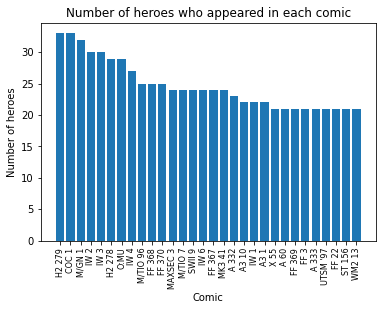

In [271]:
plt.bar(comics, counts)
plt.xlabel('Comic')
plt.ylabel('Number of heroes')
plt.title('Number of heroes who appeared in each comic')
# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90, fontsize=8)

# Show the plot
plt.show()

### A plot depicting the degree distribution of the network

In [272]:
degree_distribution1 = my_dict1['degree_distribution'] 

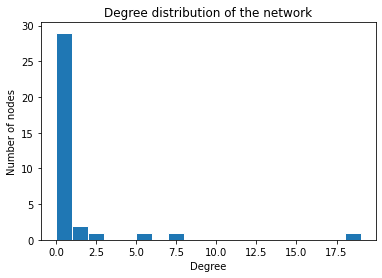

In [286]:
# Plot the degree distribution of the graph
plt.hist(degree_distribution1, bins=range(min(degree_distribution1), max(degree_distribution1)+1), edgecolor='white')
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Degree distribution of the network')

# Show the plot
plt.show()

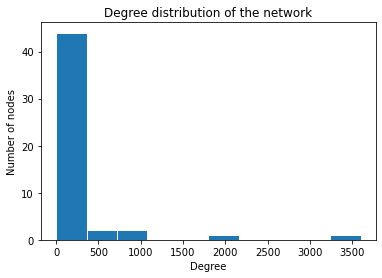

In [287]:
degree_distribution2 = my_dict2['degree_distribution']
# Plot the degree distribution of the graph
plt.hist(degree_distribution2[:50], edgecolor='white')
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Degree distribution of the network')

# Show the plot
plt.show()